# Computational Programming with Python
### Lecture 4: Functions

### Center for Mathematical Sciences, Lund University
Lecturer: Claus Führer, Malin Christersson


## This lecture

- Basic features of functions
- Scope of variables
- Default arguments
- Docstring
- Parameters and arguments
- Functions are objects
- The Newton method

## Basic features

Comparing functions in mathematics and functions in Python

In [23]:
from numpy import*
from matplotlib.pyplot import *
%matplotlib inline

## Functions in mathematics

A function is written as a map, that uniquely assigns an element $y$ from the range $R$ to every element $x$ of the domain $D$.

$$f:x \mapsto y$$

$f$ is the function, $x$ is its argument, $y$ is its (return) value

There can be several arguments of different type. Consider:

$$ f(g, a, b) = \int_a^b g(x) dx $$

The arguments are not interchangeable. Position matters.

## Functions in Python

Definition of a function:

```python
def f(x1, x2, x3):
    # some computations
    y = .... #
    return y
```

Evaluation (call) of a function:

```python
f(17, 18, -2)
f([1, 2, 3], {'tol': 1.e-10}, 'ro')
...
```

Wording:

`x1, x2, x3` are called **parameters** (needed for definition)

`17, 18, -2` are called **arguments** (needed for evaluation)

## Passing arguments

Consider:

x1 and x2 are keywords., the position doesn't matter if you have x1 - x2.

subtract(1,2) will first take 1 and subtract 2 from it. 

In [1]:
def subtract(x1, x2):
    return x1 - x2
#here we define a function subtract() to return x1-x2. We can use positional arguments but we can also write out that "x2=2"

Passing arguments by position: (Position matters.)

In [3]:
subtract(1, 2) 

-1

Passing arguments by keywords: (Position doesn't matter)

In [4]:
subtract(x2=2, x1=1)

-1

## Passing arguments (cont)

Positional arguments come first, then keyword arguments.

In [5]:
def add(x1, x2, x3, x4):
    return sum([x1, x2, x3, x4])

a1 = add(x1=1, x2=2, x3=3, x4=4)  # this works
print("a1 =", a1)

a1 = 10


In [6]:
# a2 = add(1, 2, x3=3, 4)  # this doesn't work

## Scope of variables

Variables defined inside the function are said to belong to the function’s **scope**. They are unknown outside the function. 

In [7]:
def mult2(x):
    c = 2.   # a local variable
    return c*x

print(mult2(20)) 

# print(c) # doesn't work

40.0


## Parameters and global variables

Compare:

a is a parameter of the function:
```python
def multiply(x, a):
    return a*x
```

a is referenced from outside of the  functions scope, a is a **global** variable:
```python
a = 3
def multiply(x):
    return a*x
```

## Changing argument values inside a function

Example:

In [8]:
def myfunc(a, interval):
    a = 0
    interval[0] = 0
    
my_a = 10
my_interval = [-5, 7]
myfunc(my_a, my_interval)
print(f"my_a = {my_a} my_interval = {my_interval}")

my_a = 10 my_interval = [0, 7]


## Global variables

Example 1:

In [9]:
a = 3
def multiply(x):
    a = 4
    return a*x

print(f"result = {multiply(5)} a = {a}")

result = 20 a = 3


Inside the function, `a` is a local variable that is assigned a value.

Following code doesn't work:

```python
a = 3
def multiply(x):
    a = a + 1  # doesn't work
    return a*x
```

## Default arguments

#### Example &hyphen; Free fall due to gravity

The force $F$ is proportional to the mass $m$, $F = mg$,
where $g$ is the acceleration of gravity. 

On earth $g \approx 9,8 \text{ m}/\text{s}^2$.

In [9]:
def F(g = 9.8,m):
    return m*g

F1 = F(50)
F2 = F(50, 1.625)
print(f"On earth, the force is {F1:0.1f} Newton.")
print(f"On the mooon, the force is {F2:0.1f} Newton.")

SyntaxError: non-default argument follows default argument (<ipython-input-9-bd522b4c4a4a>, line 1)

In the definition of the function, mandatory parameters must precede optional parameters (those with default values). Why?

## Arguments, Parameters - Summary

Make sure that you understood the difference

- between arguments and parameters. Argument = the specific value. Parameter = the variable 
- between function definition and function evaluation (call). Call = output of the function
- between positional arguments and keyword arguments. Positional arg = input by position. Keyword arg = 'x=2, y=3'.

## Docstring

All functions (and everything else) should be documented carefully.

A docstring is the leading comment in a function (or class):

```python
def newton(f, x0): 
    """
    Newton’s method for computing a zero of a function on input:
    f (function) given function f(x)
    x0 (float) initial guess 
    on return:
    y (float) the approximated zero of f 
    """
...
```

`help(newton)` in Python or `newton?` in IPython displays the docstring as a help text.

## Parameters and arguments

## Unpacking arguments

Positional arguments remind us of lists. Keyword arguments remind us of dictionaries.

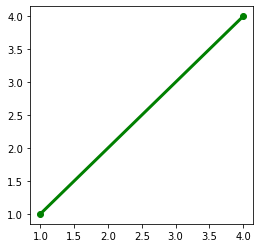

In [11]:
figure(figsize = (4, 4))  # make it square-shaped, width first, height later
data = [[1, 4], [1, 4]]
my_style = {'linewidth': 3, 'marker': 'o', 'color': 'green'} 
#both key and value will be sent. Key will be the name of the argument, value will be the value of the argument! 

# Star operators unpack these to form a valid parameter list. So for data, you get: "1,4". 
#For my_style you use ** to unpack a dictionary... you get linewidth 3, marker 'o', 'color green'.
plot(*data, **my_style)

## Star operator to unpack containers

In [12]:
a, b = [0, 1]
print("a =", a)

c, *d = [0, 1, 2, 3, 4] #c takes 0, and *d means that d will take the rest of the list on the RHS. 
print("c =", c, "d =", d)

e, *f = {"nr1": 10, "nr2": 36, "nr3": 57} # can also use .items(), .values()
print("e =", e, "f =", f) #dictionaries unpacked will contain the index as a list.  

a = 0
c = 0 d = [1, 2, 3, 4]
e = nr1 f = ['nr2', 'nr3']


## Star operator in function definitions

A function can take an optional number of **positional** arguments by using a **single star**.

In [13]:
def add(*args): ##star here means that you can input an optional number of arguments, put in front! 
    print(type(args))
    return sum(args)

s = add(1, 2, 3, 4, 5)
print("s =", s)

<class 'tuple'>
s = 15


## Star operator in function definitions (cont)

A function can take an optional number of **keyword arguments** by using a **double star**.

In [10]:
def myfunc(*args, **kwargs): ##now, double star is used when you want optional number of keyword arguments. 
    print(type(kwargs))
    for key, val in kwargs.items(): #the keyword arguments will automatically be put in a dictionary that you can flip through
        print(f"the key {key} has the value {val}")
         
myfunc(name = "Joe", age = 20)

<class 'dict'>
the key name has the value Joe
the key age has the value 20


You can use any names you want. The names `args` and `kwargs` are often used.

## Passing (tunneling) arguments
Also in the definition of functions you might find these constructs. This is often used to pass arguments through a function.

In [15]:
def outer(f, x, *args, **keywords): 
    return f(x, *args, **keywords)

def inner(x, y, z, u): 
    print(f"y = {y} z = {z}, u = {u}")
    return x**2

outer(inner, 3, 1, 2, u=15) #you can mix positional arguments

y = 1 z = 2, u = 15


9

Note, the function outer cannot know how many arguments it needs to provide a full parameter list to the “inner” function f.

## Return

The `return` statement returns a **single** object! A tuple!

```python
def myfunc(x):
    return 1, 2, 3, 4, 5, 6
```

What is the object returned here? Which type does it have?

Statements after the `return` statement are ignored.

```python
def myfunc(x):
    return 1, 2, 3
    z = 25  # ignored
```

## No return

A function without a return statement returns `None`.

In [16]:
def show_message():
    print("Hello World!")
    
a = show_message()
print(type(a))

print(a is None)

Hello World!
<class 'NoneType'>
True


## Functions are objects

Functions are objects, they can be deleted, reassigned, copied ...

In [21]:
def square(x):
    return x**2

print("square(4) =", square(4))

sq = square  # now sq is the same as square

del square # square doesn't exist anymor

i = 5
print("sq",i,"=", sq(i))

square(4) = 16
sq 5 = 25


## Partial Application (or closures)

In mathematics we often "freeze" a parameter of a function: $f_\omega(x) = f(x, \omega) = \sin(\omega, x)$

In Python we can do this:

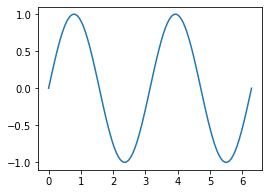

In [28]:
def make_sin(omega):
    def f(x): #you define a function within a function because you can only integrate one variable at a time in python
        return sin(omega*x) #since omega is treated as a constant, we can now integrate this with a running variable x. 
    return f
figure(figsize = (4, 3))
fomega = make_sin(2)
x = linspace(0, 2*pi, 100)
plot(x, fomega(x))

## Anonymous functions &hyphen; the `lambda` keyword

With $\lambda$-functions one has a handy tool making one-line function definitions:

In [19]:
f = lambda x: 3*x**2 + 2*x + 0.5 #lambda is just shorter. if you want to send in a funciton to another: use 'def'

print(f(3))

g = lambda x, y: 3*x - 2*y

print(g(1, 1))

33.5
1


Example for a common application, compute $\int_0^1x^2+5dx$.

In [30]:
import scipy.integrate as si
result, error = si.quad(lambda x: x**2+5, 0, 1)
print(result)

5.333333333333333


## Closures and $\lambda$

$$f_\omega(x)=f(x, \omega) = \sin(\omega x)$$

8.85218062615943e-17


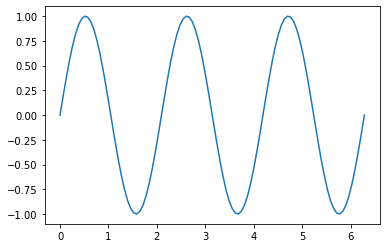

In [31]:
omega = 3
fomega = lambda x: sin(omega*x)

result, error = si.quad(fomega, 0, 2*pi)
print(result)
x = linspace(0, 2*pi, 100)
plot(x, fomega(x))